In [3]:
from lib import spm_pipelines, fsl_pipelines

from os.path import join as opj
import os
from nipype import config
config.enable_debug_mode()

221205-17:19:43,118 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.8.2


stty: 'standard input': Inappropriate ioctl for device


In [4]:
exp_dir = '/srv/tempdd/egermani/hcp_pipelines/data/original'
result_dir = '/srv/tempdd/egermani/hcp_pipelines/data/derived'

working_dir = 'fsl_preprocessing/intermediate_results'
output_dir = 'fsl_preprocessing'

subject_list =["116726","118528","130720","131823","135124","136126","150524","152225","167743","176542"]

task_list = ['MOTOR']

contrast_list = ['lf', 'rf', 'rh', 'lh', 't']

fwhm_list = [8]

In [3]:
for subjects in subject_list:
    preprocess = fsl_pipelines.get_preprocessing(exp_dir, result_dir, working_dir, output_dir, [subjects], task_list, 
                                                fwhm_list)
    preprocess.run()

220928-09:17:38,675 nipype.workflow INFO:
	 Workflow preprocess_fsl settings: ['check', 'execution', 'logging', 'monitoring']
220928-09:17:38,765 nipype.workflow INFO:
	 Running serially.
220928-09:17:38,767 nipype.workflow INFO:
	 [Node] Setting-up "preprocess_fsl.selectfiles_preproc" in "/home/hcp/fsl_preprocessing/intermediate_results/preprocess_fsl/_fwhm_8_subject_id_100206_task_MOTOR/selectfiles_preproc".
220928-09:17:38,813 nipype.workflow INFO:
	 [Node] Executing "selectfiles_preproc" <nipype.interfaces.io.SelectFiles>
220928-09:17:38,826 nipype.workflow INFO:
	 [Node] Finished "selectfiles_preproc", elapsed time 0.010919s.
220928-09:17:38,853 nipype.workflow INFO:
	 [Node] Setting-up "preprocess_fsl.img2float" in "/home/hcp/fsl_preprocessing/intermediate_results/preprocess_fsl/_fwhm_8_subject_id_100206_task_MOTOR/img2float".
220928-09:17:38,874 nipype.workflow INFO:
	 [Node] Cached "preprocess_fsl.img2float" - collecting precomputed outputs
220928-09:17:38,875 nipype.workflow I

220928-09:17:39,625 nipype.workflow INFO:
	 [Node] Cached "preprocess_fsl.featpreproc.susan_smooth.merge" - collecting precomputed outputs
220928-09:17:39,627 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.susan_smooth.merge" found cached.
220928-09:17:39,628 nipype.workflow INFO:
	 [Node] Setting-up "preprocess_fsl.featpreproc.susan_smooth.multi_inputs" in "/home/hcp/fsl_preprocessing/intermediate_results/preprocess_fsl/featpreproc/susan_smooth/_fwhm_8_subject_id_100206_task_MOTOR/multi_inputs".
220928-09:17:39,661 nipype.workflow INFO:
	 [Node] Cached "preprocess_fsl.featpreproc.susan_smooth.multi_inputs" - collecting precomputed outputs
220928-09:17:39,662 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.susan_smooth.multi_inputs" found cached.
220928-09:17:39,684 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.susan_smooth.smooth" found cached.
220928-09:17:39,708 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.maskfunc3" found cached.
22

220928-09:17:51,167 nipype.workflow INFO:
	 [Node] Setting-up "preprocess_fsl.featpreproc.meanfunc" in "/home/hcp/fsl_preprocessing/intermediate_results/preprocess_fsl/featpreproc/_fwhm_8_subject_id_100307_task_MOTOR/meanfunc".
220928-09:17:51,185 nipype.workflow INFO:
	 [Node] Cached "preprocess_fsl.featpreproc.meanfunc" - collecting precomputed outputs
220928-09:17:51,186 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.meanfunc" found cached.
220928-09:17:51,208 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.plot_motion" found cached.
220928-09:17:51,230 nipype.workflow INFO:
	 [Node] "preprocess_fsl.featpreproc.plot_motion" found cached.
220928-09:17:51,231 nipype.workflow INFO:
	 [Node] Setting-up "preprocess_fsl.registration.mean2anatbbr" in "/home/hcp/fsl_preprocessing/intermediate_results/preprocess_fsl/registration/_fwhm_8_subject_id_100307_task_MOTOR/mean2anatbbr".
220928-09:17:51,269 nipype.workflow INFO:
	 [Node] Cached "preprocess_fsl.registration.mea

In [ ]:
import importlib
importlib.reload(fsl_pipelines)
nb_param=[24]
hrf=['derivatives']
for subjects in subject_list:
    l1_analysis = fsl_pipelines.get_l1_analysis(exp_dir, output_dir, working_dir, result_dir, 
                                                     [subjects], task_list, contrast_list, fwhm_list, 
                                                     nb_param, hrf)
    l1_analysis.run('MultiProc', plugin_args={'n_procs': 16})

Use derivatives
221205-17:19:44,780 nipype.workflow DEBUG:
	 (l1_analysis_fsl.infosource, l1_analysis_fsl.selectfiles): No edge data
221205-17:19:44,780 nipype.workflow DEBUG:
	 (l1_analysis_fsl.infosource, l1_analysis_fsl.selectfiles): new edge data: {'connect': [('subject_id', 'subject_id'), ('task', 'task'), ('fwhm', 'fwhm')]}
221205-17:19:44,781 nipype.workflow DEBUG:
	 (l1_analysis_fsl.selectfiles, l1_analysis_fsl.subject_infos): No edge data
221205-17:19:44,782 nipype.workflow DEBUG:
	 (l1_analysis_fsl.selectfiles, l1_analysis_fsl.subject_infos): new edge data: {'connect': [('event', 'event_file')]}
221205-17:19:44,783 nipype.workflow DEBUG:
	 (l1_analysis_fsl.selectfiles, l1_analysis_fsl.specify_model): No edge data
221205-17:19:44,784 nipype.workflow DEBUG:
	 (l1_analysis_fsl.selectfiles, l1_analysis_fsl.specify_model): new edge data: {'connect': [('func', 'functional_runs')]}
221205-17:19:44,785 nipype.workflow DEBUG:
	 (l1_analysis_fsl.subject_infos, l1_analysis_fsl.specify_m

221205-17:19:44,973 nipype.workflow DEBUG:
	 [Node] Up-to-date cache found for "l1_analysis_fsl.selectfiles".
221205-17:19:44,973 nipype.workflow DEBUG:
	 Checking hash "l1_analysis_fsl.selectfiles" locally: cached=True, updated=True.
221205-17:19:45,82 nipype.workflow DEBUG:
	 [MultiProc] Submitted task l1_analysis_fsl.selectfiles (taskid=1).
221205-17:19:45,87 nipype.workflow INFO:
	 [Node] Setting-up "l1_analysis_fsl.selectfiles" in "/srv/tempdd/egermani/hcp_pipelines/data/derived/fsl_preprocessing/intermediate_results/l1_analysis_fsl/_fwhm_8_hrf_derivatives_nb_param_24_subject_id_116726_task_MOTOR/selectfiles".
221205-17:19:45,89 nipype.workflow DEBUG:
	 [Node] Hashes: [('base_directory', '/srv/tempdd/egermani/hcp_pipelines/data/derived'), ('force_lists', False), ('fwhm', 8), ('raise_on_empty', True), ('sort_filelist', True), ('subject_id', '116726'), ('task', 'MOTOR')], 48cd1dc56605e3d0d9e96e0ec7cb746d, /srv/tempdd/egermani/hcp_pipelines/data/derived/fsl_preprocessing/intermediate

221205-17:19:47,7 nipype.workflow DEBUG:
	 [Node] Up-to-date cache found for "l1_analysis_fsl.subject_infos".
221205-17:19:47,8 nipype.workflow DEBUG:
	 Checking hash "l1_analysis_fsl.subject_infos" locally: cached=True, updated=True.
221205-17:19:47,8 nipype.workflow DEBUG:
	 Skipping cached node l1_analysis_fsl.subject_infos with ID 1.
221205-17:19:47,8 nipype.workflow INFO:
	 [Job 1] Cached (l1_analysis_fsl.subject_infos).
221205-17:19:47,10 nipype.workflow DEBUG:
	 Allocating l1_analysis_fsl.param_extent ID=2 (0.20GB, 1 threads). Free: 338.50GB, 14 threads.
221205-17:19:47,12 nipype.workflow DEBUG:
	 [Node] Setting 1 connected inputs of node "param_extent" from 1 previous nodes.
221205-17:19:47,12 nipype.utils DEBUG:
	 Loading pkl: /srv/tempdd/egermani/hcp_pipelines/data/derived/fsl_preprocessing/intermediate_results/l1_analysis_fsl/_fwhm_8_hrf_derivatives_nb_param_24_subject_id_116726_task_MOTOR/selectfiles/result_selectfiles.pklz
221205-17:19:47,13 nipype.workflow DEBUG:
	 Resolv

221205-17:19:50,984 nipype.utils DEBUG:
	 Loading pkl: /srv/tempdd/egermani/hcp_pipelines/data/derived/fsl_preprocessing/intermediate_results/l1_analysis_fsl/_fwhm_8_hrf_derivatives_nb_param_24_subject_id_116726_task_MOTOR/specify_model/result_specify_model.pklz
221205-17:19:50,992 nipype.workflow DEBUG:
	 Resolving paths in outputs loaded from results file.
221205-17:19:50,996 nipype.workflow DEBUG:
	 output: session_info
221205-17:19:51,2 nipype.workflow DEBUG:
	 [Node] l1_design - setting input session_info = [{'cond': [{'name': 'lf', 'onset': [26.122, 116.752], 'duration': [12.0, 12.0]}, {'name': 'lh', 'onset': [71.504, 162.0], 'duration': [12.0, 12.0]}, {'name': 'rf', 'onset': [56.376, 177.127], 'duration': [12.0, 12.0]}, {'name': 'rh', 'onset': [10.995, 131.879], 'duration': [12.0, 12.0]}, {'name': 't', 'onset': [41.249, 101.625], 'duration': [12.0, 12.0]}], 'hpf': 60.0, 'regress': [{'name': 'Realign1', 'val': [-0.00347174, -0.0021643, -0.000749558, -0.00181242, -0.0040129, -0.00

221205-17:19:51,27 nipype.workflow DEBUG:
	 [Node] Hashes: [('bases', [('dgamma', [('derivs', True)])]), ('contrasts', [('lf vs baseline', 'T', ['lf'], ['1.0000000000']), ('lh vs baseline', 'T', ['lh'], ['1.0000000000']), ('rf vs baseline', 'T', ['rf'], ['1.0000000000']), ('rh vs baseline', 'T', ['rh'], ['1.0000000000']), ('t vs baseline', 'T', ['t'], ['1.0000000000'])]), ('interscan_interval', '0.7200000000'), ('model_serial_correlations', True), ('orthogonalization', []), ('session_info', [[('cond', [[('duration', ['12.0000000000', '12.0000000000']), ('name', 'lf'), ('onset', ['26.1220000000', '116.7520000000'])], [('duration', ['12.0000000000', '12.0000000000']), ('name', 'lh'), ('onset', ['71.5040000000', '162.0000000000'])], [('duration', ['12.0000000000', '12.0000000000']), ('name', 'rf'), ('onset', ['56.3760000000', '177.1270000000'])], [('duration', ['12.0000000000', '12.0000000000']), ('name', 'rh'), ('onset', ['10.9950000000', '131.8790000000'])], [('duration', ['12.000000000

221205-17:19:51,28 nipype.workflow DEBUG:
	 [Node] Up-to-date cache found for "l1_analysis_fsl.l1_design".
221205-17:19:51,28 nipype.workflow DEBUG:
	 Checking hash "l1_analysis_fsl.l1_design" locally: cached=True, updated=True.
221205-17:19:51,29 nipype.workflow DEBUG:
	 Skipping cached node l1_analysis_fsl.l1_design with ID 4.
221205-17:19:51,32 nipype.workflow INFO:
	 [Job 4] Cached (l1_analysis_fsl.l1_design).
221205-17:19:52,918 nipype.workflow DEBUG:
	 Progress: 8 jobs, 5/0/1 (done/running/ready), 0/3 (pending_tasks/waiting).
221205-17:19:52,919 nipype.workflow DEBUG:
	 Tasks currently running: 0. Pending: 0.
221205-17:19:52,990 nipype.workflow DEBUG:
	 Allocating l1_analysis_fsl.model_generation ID=5 (0.20GB, 1 threads). Free: 338.70GB, 15 threads.
221205-17:19:52,993 nipype.workflow DEBUG:
	 [Node] Setting 2 connected inputs of node "model_generation" from 1 previous nodes.
221205-17:19:52,993 nipype.utils DEBUG:
	 Loading pkl: /srv/tempdd/egermani/hcp_pipelines/data/derived/fs

221205-17:19:53,3 nipype.workflow DEBUG:
	 [Node] Up-to-date cache found for "l1_analysis_fsl.model_generation".
221205-17:19:53,4 nipype.workflow DEBUG:
	 Checking hash "l1_analysis_fsl.model_generation" locally: cached=True, updated=True.
221205-17:19:53,4 nipype.workflow DEBUG:
	 Skipping cached node l1_analysis_fsl.model_generation with ID 5.
221205-17:19:53,4 nipype.workflow INFO:
	 [Job 5] Cached (l1_analysis_fsl.model_generation).
221205-17:19:54,920 nipype.workflow DEBUG:
	 Progress: 8 jobs, 6/0/1 (done/running/ready), 0/2 (pending_tasks/waiting).
221205-17:19:54,921 nipype.workflow DEBUG:
	 Tasks currently running: 0. Pending: 0.
221205-17:19:54,985 nipype.workflow DEBUG:
	 Allocating l1_analysis_fsl.model_estimate ID=6 (0.20GB, 1 threads). Free: 338.70GB, 15 threads.
221205-17:19:54,987 nipype.workflow DEBUG:
	 [Node] Not cached "/srv/tempdd/egermani/hcp_pipelines/data/derived/fsl_preprocessing/intermediate_results/l1_analysis_fsl/_fwhm_8_hrf_derivatives_nb_param_24_subject_i

In [ ]:
from nilearn import plotting
stat_map_fsl = '/home/hcp+++++.feat/stats/tstat1.nii.gz'
plotting.plot_stat_map(stat_map_fsl, title = 'FSL', cut_coords = (0, -20, 20))
stat_map_np = '/home/hcp/fsl_preprocessing/l1_analysis_fsl/_contrast_lf_fwhm_8_subject_id_100206_task_MOTOR/results/tstat1.nii.gz'
plotting.plot_stat_map(stat_map_np, title = 'Nipype', cut_coords = (0, -20, 20))

In [9]:
func2anat_transform_file = opj(output_dir, 'preprocess_fsl', '_fwhm_{fwhm}_subject_id_{subject_id}_task_{task}', 
                        '{subject_id}_3T_tfMRI_{task}_LR_dtype_roi_flirt.mat')
anat2target_transform_file = opj(output_dir, 'preprocess_fsl', '_fwhm_{fwhm}_subject_id_{subject_id}_task_{task}', 
                        '{subject_id}_3T_T1w_MPR1_fieldwarp.nii.gz')
stat_file = opj(output_dir, 'l1_analysis_fsl', '_contrast_{contrast}_fwhm_{fwhm}_subject_id_{subject_id}_task_{task}',
                'results', 'cope1.nii.gz')

In [10]:
import importlib
importlib.reload(fsl_pipelines)
reg = fsl_pipelines.get_registration(exp_dir, output_dir, working_dir, result_dir, subject_list, task_list, 
                                     contrast_list, fwhm_list)

In [11]:
reg.run()

220929-12:30:34,883 nipype.workflow INFO:
	 Workflow registration_fsl settings: ['check', 'execution', 'logging', 'monitoring']
220929-12:30:35,319 nipype.workflow INFO:
	 Running serially.
220929-12:30:35,321 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.selectfiles" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_lf_fwhm_8_subject_id_102614_task_MOTOR/selectfiles".
220929-12:30:35,374 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:35,396 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.008554s.
220929-12:30:35,432 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.selectfiles" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rf_fwhm_8_subject_id_102614_task_MOTOR/selectfiles".
220929-12:30:35,477 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:35,486 nipype.workflow INF

220929-12:30:37,323 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:37,328 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.002996s.
220929-12:30:37,361 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.selectfiles" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_t_fwhm_8_subject_id_103010_task_MOTOR/selectfiles".
220929-12:30:37,433 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:37,443 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.005323s.
220929-12:30:37,481 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.selectfiles" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_lf_fwhm_8_subject_id_103111_task_MOTOR/selectfiles".
220929-12:30:37,548 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:37,562 n

220929-12:30:39,323 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:39,330 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.003518s.
220929-12:30:39,365 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.selectfiles" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_lh_fwhm_8_subject_id_103515_task_MOTOR/selectfiles".
220929-12:30:39,413 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:39,423 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.006884s.
220929-12:30:39,478 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.selectfiles" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_t_fwhm_8_subject_id_103515_task_MOTOR/selectfiles".
220929-12:30:39,542 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
220929-12:30:39,551 n

220929-12:30:54,803 nipype.workflow INFO:
	 [Node] Finished "warpall", elapsed time 1.034105s.
220929-12:30:54,826 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.warpall" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rh_fwhm_8_subject_id_102816_task_MOTOR/warpall".
220929-12:30:54,866 nipype.workflow INFO:
	 [Node] Executing "warpall" <nipype.interfaces.fsl.preprocess.ApplyWarp>
220929-12:30:55,976 nipype.workflow INFO:
	 [Node] Finished "warpall", elapsed time 1.105601s.
220929-12:30:56,1 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.warpall" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_lh_fwhm_8_subject_id_102816_task_MOTOR/warpall".
220929-12:30:56,35 nipype.workflow INFO:
	 [Node] Executing "warpall" <nipype.interfaces.fsl.preprocess.ApplyWarp>
220929-12:30:57,190 nipype.workflow INFO:
	 [Node] Finished "warpall", elapsed time 1.152302s.
220929-12:30:57,225 nipype.workflow INFO:
	 [Node]

220929-12:31:17,730 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.warpall" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rf_fwhm_8_subject_id_103414_task_MOTOR/warpall".
220929-12:31:17,761 nipype.workflow INFO:
	 [Node] Executing "warpall" <nipype.interfaces.fsl.preprocess.ApplyWarp>
220929-12:31:18,883 nipype.workflow INFO:
	 [Node] Finished "warpall", elapsed time 1.119976s.
220929-12:31:18,909 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.warpall" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rh_fwhm_8_subject_id_103414_task_MOTOR/warpall".
220929-12:31:18,956 nipype.workflow INFO:
	 [Node] Executing "warpall" <nipype.interfaces.fsl.preprocess.ApplyWarp>
220929-12:31:20,193 nipype.workflow INFO:
	 [Node] Finished "warpall", elapsed time 1.233192s.
220929-12:31:20,221 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.warpall" in "/home/hcp/fsl_preprocessing/intermediate_results/

220929-12:31:34,872 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
220929-12:31:34,909 nipype.workflow INFO:
	 [Node] Finished "datasink", elapsed time 0.016764s.
220929-12:31:34,954 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.datasink" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rf_fwhm_8_subject_id_102715_task_MOTOR/datasink".
220929-12:31:35,19 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
220929-12:31:35,41 nipype.workflow INFO:
	 [Node] Finished "datasink", elapsed time 0.018419s.
220929-12:31:35,79 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.datasink" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rh_fwhm_8_subject_id_102715_task_MOTOR/datasink".
220929-12:31:35,125 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
220929-12:31:35,141 nipype.workflow INFO:
	 [Node] Finished

220929-12:31:36,916 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
220929-12:31:36,927 nipype.workflow INFO:
	 [Node] Finished "datasink", elapsed time 0.009018s.
220929-12:31:36,956 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.datasink" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rf_fwhm_8_subject_id_103212_task_MOTOR/datasink".
220929-12:31:36,988 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
220929-12:31:37,7 nipype.workflow INFO:
	 [Node] Finished "datasink", elapsed time 0.016005s.
220929-12:31:37,38 nipype.workflow INFO:
	 [Node] Setting-up "registration_fsl.datasink" in "/home/hcp/fsl_preprocessing/intermediate_results/registration_fsl/_contrast_rh_fwhm_8_subject_id_103212_task_MOTOR/datasink".
220929-12:31:37,102 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
220929-12:31:37,127 nipype.workflow INFO:
	 [Node] Finished

In [ ]:
from nilearn import plotting
import nibabel as nib
from lib import processing
spm_list = ['100206', '100307', '100408', '100610', '101006', '101107']
fsl_list = ['101309', '101410', '101915', '102008', '102109', '102311']
for sub in subject_list:
    #stat_map_fsl = f'/home/hcp/fsl_preprocessing/registration_fsl/_contrast_lf_fwhm_8_subject_id_{sub}_task_MOTOR/cope1_warp.nii.gz'
    #plotting.plot_stat_map(stat_map_fsl, title = 'FSL wrapped masked', cut_coords = (0, -20, 20))
    stat_map_spm = f'/home/hcp/spm_preprocessing/l1_analysis_spm/_contrast_lf_fwhm_8_subject_id_{sub}_task_MOTOR/con_0001.nii'
    #plotting.plot_stat_map(stat_map_spm, title = 'SPM not masked', cut_coords = (0, -20, 20))
    #fsl_contrast = processing.rescaling(stat_map_fsl, 0.01)
    spm_contrast = processing.rescaling(processing.masking(processing.resampling(stat_map_spm)), 0.4)

/opt/miniconda-latest/envs/neuro/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


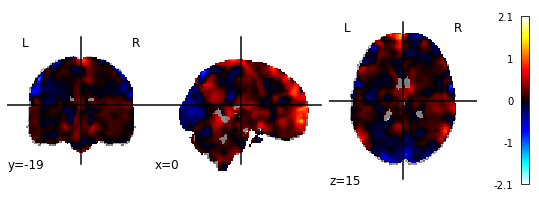

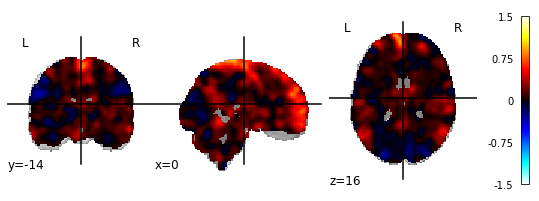

In [5]:
plotting.plot_stat_map(fsl_contrast)
plotting.plot_stat_map(spm_contrast)

In [1]:
from lib import spm_pipelines

exp_dir = '/home/hcp/data'
result_dir = '/home/hcp'

working_dir = 'soft_merge/intermediate_results'
output_dir = 'soft_merge'

spm_ids = ['100206', '100307', '100408', '100610', '101006', '101107']
fsl_ids = ['101309', '101410', '101915', '102008', '102109', '102311']

contrast_list = ['lf']
task_list = ['MOTOR']


220927-13:28:00,332 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.8.2


In [3]:
l2 = spm_pipelines.get_l2_analysis(exp_dir, output_dir, working_dir, result_dir, fsl_ids, spm_ids, 
                             contrast_list, task_list)

In [4]:
l2.run()

220927-13:30:03,299 nipype.workflow INFO:
	 Workflow l2_analysis settings: ['check', 'execution', 'logging', 'monitoring']
220927-13:30:03,365 nipype.workflow INFO:
	 Running serially.
220927-13:30:03,366 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.selectfiles_groupanalysis" in "/home/hcp/soft_merge/intermediate_results/l2_analysis/_contrast_lf_task_MOTOR/selectfiles_groupanalysis".
220927-13:30:03,400 nipype.workflow INFO:
	 [Node] Executing "selectfiles_groupanalysis" <nipype.interfaces.io.SelectFiles>
220927-13:30:03,441 nipype.workflow INFO:
	 [Node] Finished "selectfiles_groupanalysis", elapsed time 0.03917s.
220927-13:30:03,469 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.sub_contrasts" in "/home/hcp/soft_merge/intermediate_results/l2_analysis/_contrast_lf_task_MOTOR/sub_contrasts".
220927-13:30:03,517 nipype.workflow INFO:
	 [Node] Executing "sub_contrasts" <nipype.interfaces.utility.wrappers.Function>
220927-13:30:03,521 nipype.workflow INFO:
	 [Node] Finis

stty: 'standard input': Inappropriate ioctl for device


220927-13:30:26,339 nipype.workflow INFO:
	 [Node] Finished "estimate_model", elapsed time 14.149066s.
220927-13:30:26,358 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.estimate_contrast" in "/home/hcp/soft_merge/intermediate_results/l2_analysis/_contrast_lf_task_MOTOR/estimate_contrast".
220927-13:30:26,428 nipype.workflow INFO:
	 [Node] Executing "estimate_contrast" <nipype.interfaces.spm.model.EstimateContrast>


stty: 'standard input': Inappropriate ioctl for device


220927-13:30:35,218 nipype.workflow INFO:
	 [Node] Finished "estimate_contrast", elapsed time 8.787914s.
220927-13:30:35,273 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/hcp/soft_merge/intermediate_results/l2_analysis/_contrast_lf_task_MOTOR/threshold/mapflow/_threshold0".
220927-13:30:35,330 nipype.workflow INFO:
	 [Node] Executing "_threshold0" <nipype.interfaces.spm.model.Threshold>


stty: 'standard input': Inappropriate ioctl for device


220927-13:30:38,739 nipype.workflow INFO:
	 [Node] Finished "_threshold0", elapsed time 3.406667s.
220927-13:30:38,779 nipype.workflow INFO:
	 [Node] Setting-up "_threshold1" in "/home/hcp/soft_merge/intermediate_results/l2_analysis/_contrast_lf_task_MOTOR/threshold/mapflow/_threshold1".
220927-13:30:38,859 nipype.workflow INFO:
	 [Node] Executing "_threshold1" <nipype.interfaces.spm.model.Threshold>


stty: 'standard input': Inappropriate ioctl for device


220927-13:30:42,165 nipype.workflow INFO:
	 [Node] Finished "_threshold1", elapsed time 3.302844s.
220927-13:30:42,217 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.datasink_groupanalysis" in "/home/hcp/soft_merge/intermediate_results/l2_analysis/_contrast_lf_task_MOTOR/datasink_groupanalysis".
220927-13:30:42,271 nipype.workflow INFO:
	 [Node] Executing "datasink_groupanalysis" <nipype.interfaces.io.DataSink>


stty: 'standard input': Inappropriate ioctl for device


220927-13:30:42,365 nipype.workflow INFO:
	 [Node] Finished "datasink_groupanalysis", elapsed time 0.09027s.


In [37]:
from nilearn import plotting 
import nibabel as nib 
import numpy as np
thresh_map = '/home/hcp/soft_merge/l2_analysis/_contrast_lf_task_MOTOR/_threshold0/spmT_0001_thr.nii'

In [38]:
t = nib.load(thresh_map).get_fdata()

In [39]:
(t > 0).sum()

0